In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Week 1 - 3

In [4]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize
x_train = x_train / 255
x_train = x_train.reshape(60000, 28, 28, 1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if(logs['accuracy'] > 0.9):
            print('\nReached accuracy of 90%')
            self.model.stop_training = True
callback = MyCallback()

model.fit(x_train, y_train, epochs=10, callbacks=[callback]);

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.4082 - accuracy: 0.8543
Epoch 2/10
60000/60000 [==============================] - 15s 249us/sample - loss: 0.2765 - accuracy: 0.8989
Epoch 3/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.2268 - accuracy: 0.9167
Reached accuracy of 90%
60000/60000 [==============================] - 15s 254us/sample - loss: 0.2266 - accuracy: 0.9168


## Test

In [10]:
x_test = x_test
x_test = x_test.reshape(10000, 28, 28, 1)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy =', test_acc)

Test accuarcy = 0.868


## Predict

Prediction: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


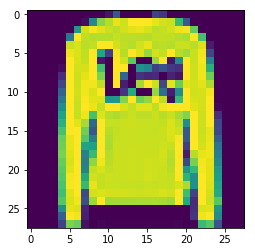

In [9]:
img = x_test[1]
plt.imshow(img)
pred = model.predict(img.reshape(1, 28, 28, 1).astype(np.float64))
print('Prediction:', pred)

## Visualize Layers

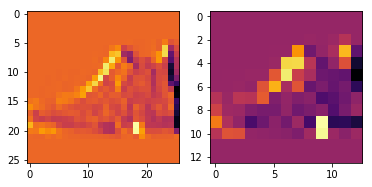

In [16]:
fig, axarr = plt.subplots(1,2)
img_id = 0;
CONVOLUTION_NUMBER = 5
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)
for x in range(0,2):
    f = activation_model.predict(x_test[img_id].reshape(1, 28, 28 ,1))[x]
    axarr[x].imshow(f[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[x].grid(False)
    
    
